# Fitting Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit

## Set Algorithms
So far the theoretical results for these algorithms are 
work is $O(m\log(\frac{n+m}{m})$ and span $O(\log(n)\log(m))$.
#### Fitting to $\alpha\cdot m\log(\beta \cdot \frac{n+m}{m} + \zeta ) + \gamma \cdot m + c$

In [29]:
# Using Scipy minimize

def fitting_fucntion_factory(x):
    alpha = x[0]
    beta = x[1]
    zeta = x[2]
    gamma = x[3]
    c = x[4]
    def fitting_function(lt, rt):
        m = min(lt, rt)
        n = max(lt, rt)
        return (alpha*m*np.log(beta*n/m+1+zeta)+gamma*m+c)

    return fitting_function

def treesize_filter(xs, lt_is_larger, lt_size):
    if lt_is_larger:
        return [x for x in xs if x<=lt_size]
    else:
        return [x for x in xs if x>=lt_size]
def get_means(df, xs):
    return [df.loc[df['right_tree_size'] == xi, 'execution_time'].mean() for xi in xs]
    

def objective_function_factory(df, left_tree_size, is_pre):
    xs = df.right_tree_size.unique()
    means = get_means(df, xs)
    def objective_function(x):
        eq = fitting_fucntion_factory(x)
        distance = [(eq(rt=xs[i], lt=left_tree_size)-means[i])*(eq(rt=xs[i], lt=left_tree_size)-means[i]) for i in range(len(xs))]
        return sum(distance)
    return objective_function
    
def plot_with_mean(df):
    x = df.right_tree_size.unique()
    y = get_means(df, x)
    plt.plot(x, y, 'o', alpha=0.7)
    stdd = np.array([df.loc[df['right_tree_size'] == xi, 'execution_time'].std() for xi in x])
    lower = y-stdd
    upper = y+stdd
    plt.fill_between(x, lower, upper, color='red', alpha=.5)
    plt.ylim(bottom=0)
    plt.xlim(left=0)

def plot_eq(eq, left_tree_size , end=1e7):
    xs = np.linspace(1, end)
    y = [eq(lt=left_tree_size, rt=x) for x in xs]
    plt.plot(xs, y, color="black")

def fitter(df, left_tree_size, is_pre=True, x0=[1, 1, 1, 1]):
    obj_func = objective_function_factory(union_16_32_01, left_tree_size, is_pre)
    result = minimize(obj_func, x0, bounds=((0, None),(0, None),(0, None),(0, None), (0, None)), tol=1e-20)
    print(result)
    return (fitting_fucntion_factory(result.x), result)
      


### Union

In [3]:
union_16_32_01 = pd.read_csv("../seniorProject_benchmarkData/set_runtimes/union_bench_mark_16_32_01.csv")
union_16_32_05 = pd.read_csv("../seniorProject_benchmarkData/set_runtimes/union_bench_mark_16_32_05.csv")

union_16_32_06 = pd.read_csv("../seniorProject_benchmarkData/set_runtimes/union_bench_mark_16_32_06.csv")
union_1m = union_16_32_06[union_16_32_06.left_tree_size == 1_000_000]
union_3m = union_16_32_06[union_16_32_06.left_tree_size == 3_000_000]
union_9m = union_16_32_06[union_16_32_06.left_tree_size == 9_000_000]

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 1.3303931507525276e+16
        x: [ 5.215e+02  3.922e-01  4.104e-01  5.211e-01  1.000e+00]
      nit: 53
      jac: [ 1.200e+09  1.540e+10  6.000e+08 -4.000e+08 -1.600e+09]
     nfev: 750
     njev: 125
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


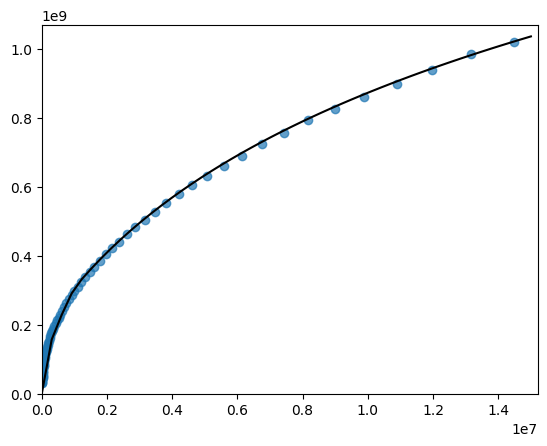

In [4]:
eq, result = fitter(union_16_32_01, 1e6, is_pre=False, x0=[1000, 1, 1, 1, 1])
fig, ax = plt.subplots()
plot_with_mean(union_16_32_01)
plot_eq(eq, 1e6, 1.5e7)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 1.3303931507776244e+16
        x: [ 5.215e+02  3.910e-01  4.062e-01  2.085e+00  1.000e+00]
      nit: 33
      jac: [-4.000e+08  1.016e+11  1.860e+10  1.400e+09 -8.000e+08]
     nfev: 432
     njev: 72
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


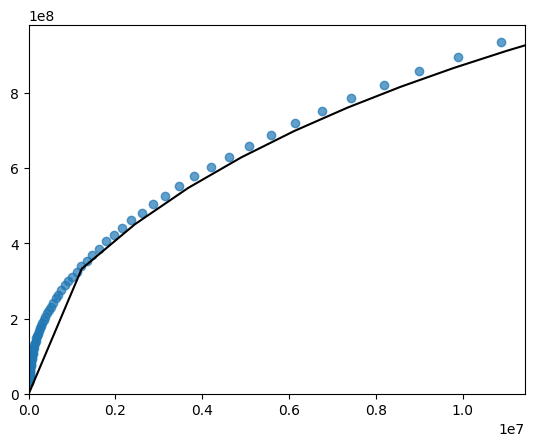

In [5]:
eq, result = fitter(union_1m, 1e6, is_pre=False, x0=[1000, 1, 1, 4, 1])
fig, ax = plt.subplots()
plot_with_mean(union_1m)
plot_eq(eq, 1e6, 6e7)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 1.382442384479388e+16
        x: [ 8.607e+02  7.600e-02  1.455e-01  8.579e-01  1.000e+01]
      nit: 53
      jac: [ 0.000e+00  7.388e+11  2.314e+11 -6.000e+08 -1.600e+09]
     nfev: 774
     njev: 129
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


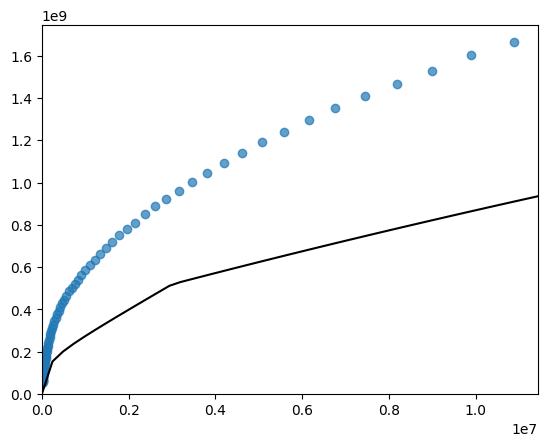

In [6]:
eq, result = fitter(union_3m, 3e6, is_pre=False, x0=[1e3, 1, 1, 1, 10])
fig, ax = plt.subplots()
plot_with_mean(union_3m)
plot_eq(eq, 3e6, 1.2e7)

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 9753796976711530.0
        x: [ 4.091e+02  1.101e-01  1.467e-01  4.073e-01  1.000e+01]
      nit: 43
      jac: [ 2.000e+09  2.123e+12  8.750e+11  2.000e+08  2.000e+08]
     nfev: 1020
     njev: 170
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


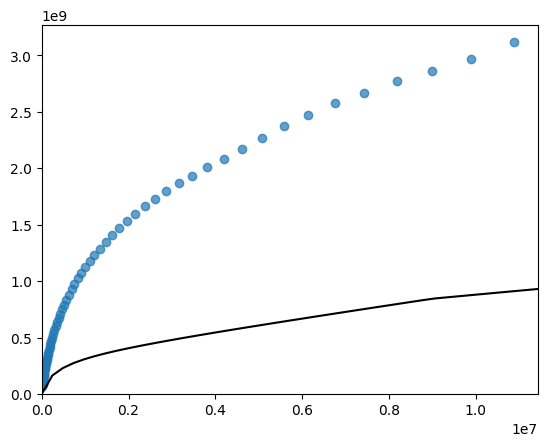

In [7]:
eq, result = fitter(union_9m, 9e6, is_pre=False, x0=[1e3, 1, 1, 1, 10])
fig, ax = plt.subplots()
plot_with_mean(union_9m)
plot_eq(eq, 9e6, 1.2e7)

In [30]:
# Using Scipy curve_fit

def fitting_fucntion_factory(tree_size, constant_tree_is_smaller=True):
    if constant_tree_is_smaller:
        def fitting_function(x, alpha, beta, zeta, gamma, c):
            m = tree_size
            n = x
            return (alpha*m*np.log(beta*(n+m)/m+zeta)+gamma*m+c)
        return fitting_function
    else:
        def fitting_function(x, alpha, beta, zeta, gamma, c):
            m = x
            n = tree_size
            return (alpha*m*np.log(beta*(n+m)/m+zeta)+gamma*m+c)
        return fitting_function


def treesize_filter(xs, lt_is_larger, lt_size):
    if lt_is_larger:
        return [x for x in xs if x<=lt_size]
    else:
        return [x for x in xs if x>=lt_size]
def get_means(df, xs):
    return [df.loc[df['right_tree_size'] == xi, 'execution_time'].mean() for xi in xs]
    

def curve_fitter(df, left_tree_size, lt_is_larger=True):
    xs = df.right_tree_size.unique()
    xdata = treesize_filter(xs, lt_is_larger, left_tree_size)
    ydata = get_means(df, xdata)
    func = fitting_fucntion_factory(left_tree_size, not lt_is_larger)
    #print(len(xdata), len(ydata))
    popt, pcov = curve_fit(func, xdata, ydata)
    plt.plot(xdata, func(np.array(xdata), *popt))
    plt.ylim(bottom=0)
￼
Type / to search
￼
￼
￼
￼
Link underlines
By default, links in text blocks on GitHub will now be underlined. You can set your preference in the accessibility settings.
￼
Ok, got it!
Code
Issues
Pull requests
Actions
Projects
Security
Insights
Settings
￼
split-join
Private
 Unwatch 1 
Fork 0
￼ Star 0
sudo-Archer/split-join
 master 
 2 branches
 0 tags
Go to file
Add file
Code
This branch is 4 commits ahead, 1 commit behind main.
 Contribute 
Latest commit
￼
sudo-Archer benchmkaring large trees
f425bf9
last week
Git stats

    plt.xlim(left=0)
    print(popt)
    return (popt, func)

    
    
      

[ 5.22063539e+02  1.40410267e+02  3.66106351e+02 -2.71350947e+03
 -3.61731870e+08]


/tmp/ipykernel_3940/3237466208.py:8: RuntimeWarning: invalid value encountered in log
  return (alpha*m*np.log(beta*(n+m)/m+zeta)+gamma*m+c)


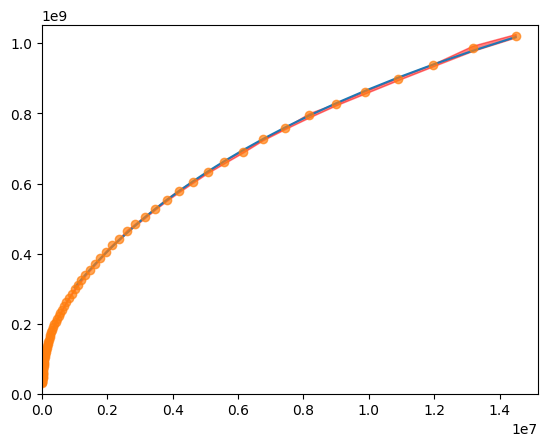

In [40]:
popt, func = curve_fitter(union_16_32_01, 1e6, lt_is_larger=False)
plot_with_mean(union_16_32_01)

[ 6.41533407e+02  2.11117701e+02  8.18618114e+02 -6.48963887e+03
  2.23509603e+09]


/tmp/ipykernel_3940/3237466208.py:8: RuntimeWarning: invalid value encountered in log
  return (alpha*m*np.log(beta*(n+m)/m+zeta)+gamma*m+c)


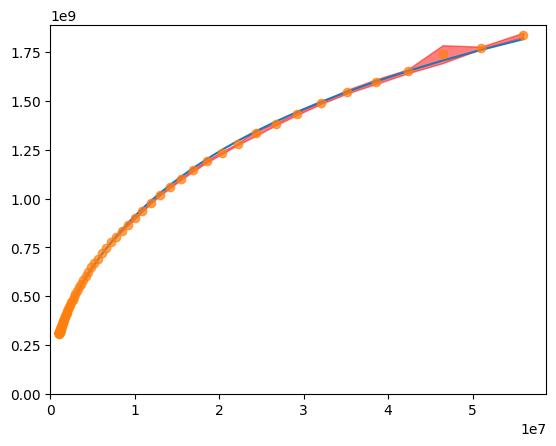

In [32]:
popt, func = curve_fitter(union_16_32_05, 1e6, lt_is_larger=False)
plot_with_mean(union_16_32_05)

[ 5.05245375e+02  1.54277554e+02  3.31960506e+02 -2.07911543e+03
 -8.71324334e+08]


/tmp/ipykernel_3940/3237466208.py:8: RuntimeWarning: invalid value encountered in log
  return (alpha*m*np.log(beta*(n+m)/m+zeta)+gamma*m+c)


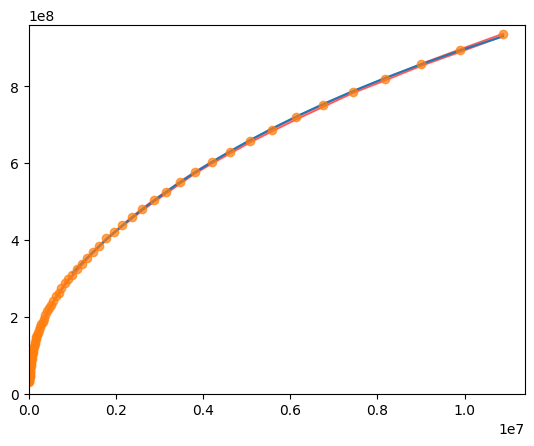

In [33]:
popt, func = curve_fitter(union_1m, 1e6, lt_is_larger=False)
plot_with_mean(union_1m)

[ 3.39772679e+02  4.42075331e+01  2.41651629e+01 -1.21884154e+03
 -2.15596110e+08]


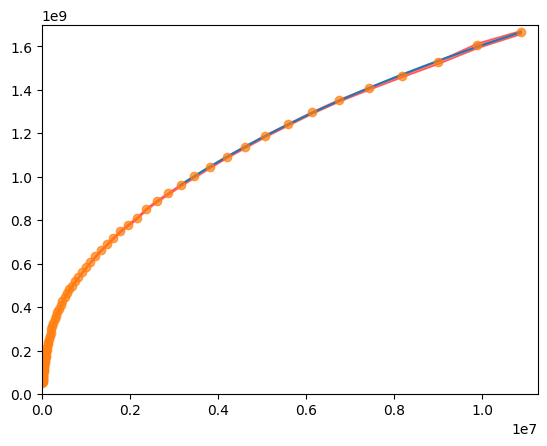

In [34]:
popt, func = curve_fitter(union_3m, 3e6, lt_is_larger=False)
plot_with_mean(union_3m)

[ 7.56600834e+02  3.66532341e+01  8.67095038e+01 -3.52014654e+03
  1.67056408e+07]


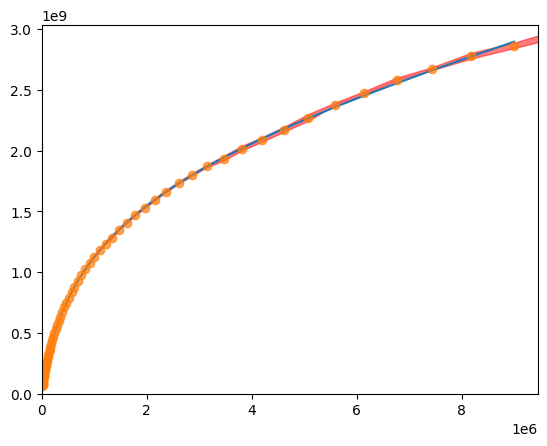

In [35]:
popt, func = curve_fitter(union_9m, 9e6, lt_is_larger=True)
plot_with_mean(union_9m)

### Intersection

In [14]:
intersect_16_32_01 = pd.read_csv("../seniorProject_benchmarkData/set_runtimes/intersect_bench_mark_16_32_01.csv")
intersect_16_32_02 = pd.read_csv("../seniorProject_benchmarkData/set_runtimes/intersection_bench_mark_16_32_02.csv")

[ 2.86012509e+02  1.32411086e+02  1.65473297e+02  3.99164902e+02
 -1.88243145e+09]


/tmp/ipykernel_3940/3237466208.py:8: RuntimeWarning: invalid value encountered in log
  return (alpha*m*np.log(beta*(n+m)/m+zeta)+gamma*m+c)


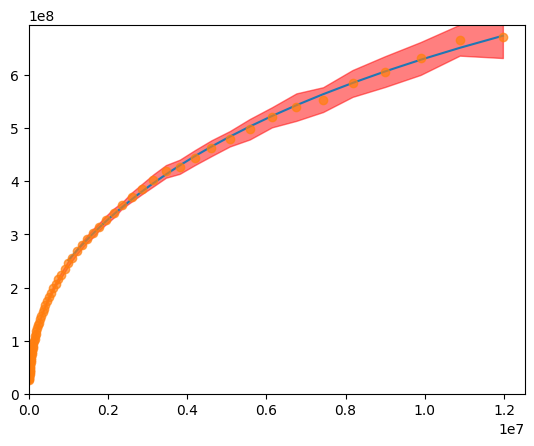

In [36]:
popt, func = curve_fitter(intersect_16_32_01, 1e6, lt_is_larger=False)
plot_with_mean(intersect_16_32_01)

[ 2.67375937e+02  9.46253501e+01  6.78087222e+01 -8.64109362e+02
 -3.72158439e+08]


/tmp/ipykernel_3940/3237466208.py:8: RuntimeWarning: invalid value encountered in log
  return (alpha*m*np.log(beta*(n+m)/m+zeta)+gamma*m+c)


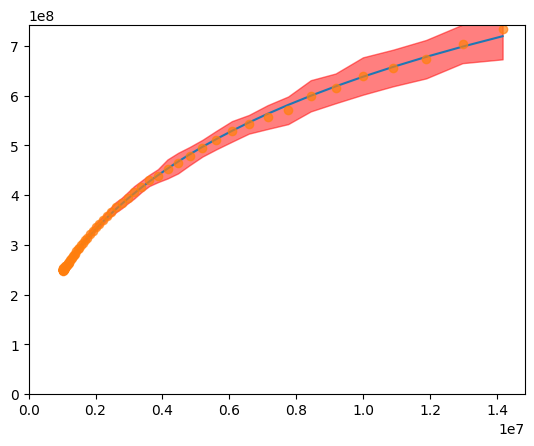

In [37]:
popt, func = curve_fitter(intersect_16_32_02, 1e6, lt_is_larger=False)
plot_with_mean(intersect_16_32_02)

### Difference

In [17]:
difference_16_32_01 = pd.read_csv("../seniorProject_benchmarkData/set_runtimes/difference_bench_mark_16_32_01.csv")

[ 3.41690318e+02  1.98624749e+02  2.95818103e+02 -1.02052523e+03
 -8.43184373e+08]


/tmp/ipykernel_3940/3237466208.py:8: RuntimeWarning: invalid value encountered in log
  return (alpha*m*np.log(beta*(n+m)/m+zeta)+gamma*m+c)


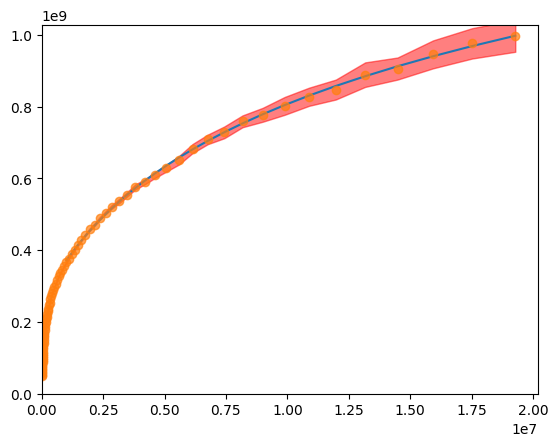

In [38]:
popt, func = curve_fitter(difference_16_32_01, 1e6, lt_is_larger=False)
plot_with_mean(difference_16_32_01)